<a href="https://colab.research.google.com/github/Susovan88/Machine_Learning/blob/main/Feature_Selection/Wrapper_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import cross_val_score
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

# Exhaustive Feature Selector

In [5]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
lr=LogisticRegression()
efs=EFS(lr,max_features=4,scoring='accuracy',cv=10)
model=efs.fit(df.iloc[:,:4],df['species'])


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

np.float64(0.9733333333333334)

In [8]:
model.best_score_

np.float64(0.9733333333333334)

In [9]:
model.best_feature_names_

('sepal_width', 'petal_length', 'petal_width')

In [10]:
model.subsets_

{0: {'feature_idx': (0,),
  'cv_scores': array([0.66666667, 0.66666667, 0.73333333, 0.73333333, 0.8       ,
         0.73333333, 0.8       , 0.73333333, 0.86666667, 0.8       ]),
  'avg_score': np.float64(0.7533333333333332),
  'feature_names': ('sepal_length',)},
 1: {'feature_idx': (1,),
  'cv_scores': array([0.53333333, 0.53333333, 0.53333333, 0.6       , 0.53333333,
         0.53333333, 0.46666667, 0.6       , 0.66666667, 0.6       ]),
  'avg_score': np.float64(0.56),
  'feature_names': ('sepal_width',)},
 2: {'feature_idx': (2,),
  'cv_scores': array([0.93333333, 0.93333333, 1.        , 1.        , 0.93333333,
         0.86666667, 0.93333333, 0.93333333, 1.        , 1.        ]),
  'avg_score': np.float64(0.9533333333333334),
  'feature_names': ('petal_length',)},
 3: {'feature_idx': (3,),
  'cv_scores': array([1.        , 1.        , 1.        , 0.93333333, 0.93333333,
         0.86666667, 0.86666667, 1.        , 1.        , 1.        ]),
  'avg_score': np.float64(0.9600000000000

In [20]:
all_scores=pd.DataFrame(model.get_metric_dict()).T.set_index('feature_names')
all_scores

,feature_idx,cv_scores,avg_score,ci_bound,std_dev,std_err
feature_names,,,,,,
"(sepal_length,)","(0,)","[0.6666666666666666, 0.6666666666666666, 0.733...",0.753333,0.044563,0.06,0.02
"(sepal_width,)","(1,)","[0.5333333333333333, 0.5333333333333333, 0.533...",0.56,0.039611,0.053333,0.017778
"(petal_length,)","(2,)","[0.9333333333333333, 0.9333333333333333, 1.0, ...",0.953333,0.031705,0.042687,0.014229
"(petal_width,)","(3,)","[1.0, 1.0, 1.0, 0.9333333333333333, 0.93333333...",0.96,0.039611,0.053333,0.017778
"(sepal_length, sepal_width)","(0, 1)","[0.6666666666666666, 0.8, 0.8666666666666667, ...",0.806667,0.056237,0.075719,0.02524
"(sepal_length, petal_length)","(0, 2)","[1.0, 0.9333333333333333, 1.0, 1.0, 0.93333333...",0.96,0.032844,0.044222,0.014741
"(sepal_length, petal_width)","(0, 3)","[0.9333333333333333, 0.8666666666666667, 1.0, ...",0.946667,0.037053,0.049889,0.01663
"(sepal_width, petal_length)","(1, 2)","[0.9333333333333333, 0.9333333333333333, 1.0, ...",0.953333,0.031705,0.042687,0.014229
"(sepal_width, petal_width)","(1, 3)","[1.0, 1.0, 1.0, 0.9333333333333333, 0.93333333...",0.953333,0.038672,0.052068,0.017356


<Axes: xlabel='feature_names'>

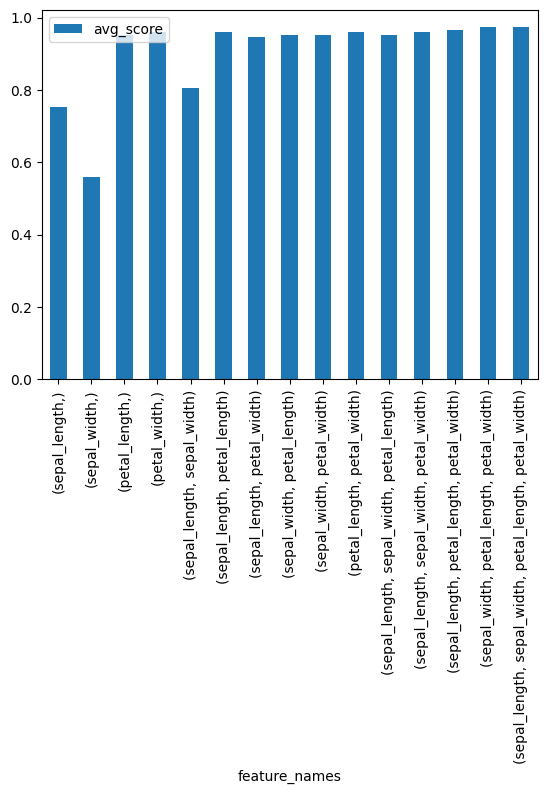

In [21]:
all_scores[['avg_score']].plot(kind='bar')

### Cross-validation is a technique to check how well a model generalizes (works on unseen data).

Instead of just splitting the dataset into train and test once, CV splits the dataset multiple times into different train/test parts, trains the model, and averages the performance.

👉 This avoids overfitting and gives a more reliable estimate of model accuracy

In [53]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [54]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['medv'], test_size=0.2, random_state=1)

print(x_train.shape)
print(x_test.shape)

(404, 13)
(102, 13)


**StandardScaler** is a data preprocessing tool in sklearn.preprocessing.

It standardizes features by removing the mean and scaling to unit variance.

In [55]:
from sklearn.preprocessing import StandardScaler

stds=StandardScaler()
x_train=stds.fit_transform(x_train)
X_test=stds.transform(x_test)

In [56]:
from sklearn.metrics import r2_score

model=LinearRegression()

print('Training r2_score ',np.mean(cross_val_score(model,x_train,y_train,cv=15,scoring='r2')))
print('Testing r2_score ',np.mean(cross_val_score(model,x_test,y_test,cv=15,scoring='r2')))

Training r2_score  0.6872372913241235
Testing r2_score  0.5182248077726095


In [57]:
lr=LinearRegression()

efs=EFS(lr,max_features=x_train.shape[1],scoring='r2',print_progress=True)

sel=efs.fit(x_train,y_train)    ## total (2^n-1) subsets -> one by one calculate r2_score using linear regression , and give best r2_score subset of features

Features: 8191/8191

In [58]:
sel.best_score_

np.float64(0.7100327839218561)

In [59]:
sel.best_feature_names_

('0', '1', '4', '5', '7', '8', '9', '10', '11', '12')

In [60]:
all_score=pd.DataFrame(sel.get_metric_dict()).T
all_score['number_of_features']=all_score['feature_idx'].apply(lambda x:len(x))
all_score['observations']=x_train.shape[0]
all_score.set_index('feature_idx',inplace=True)
all_score

,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,number_of_features,observations
feature_idx,,,,,,,,
"(0,)","[0.07656621140522701, 0.13213260440584007, 0.2...",0.140949,"(0,)",0.07449,0.057955,0.028978,1,404
"(1,)","[0.04446558097159892, 0.21253337744665224, 0.1...",0.128658,"(1,)",0.069715,0.05424,0.02712,1,404
"(2,)","[0.25938953325930125, 0.1480059959929817, 0.35...",0.240785,"(2,)",0.088759,0.069057,0.034529,1,404
"(3,)","[-0.08943302320629964, 0.054653710735299676, -...",-0.026044,"(3,)",0.071176,0.055378,0.027689,1,404
"(4,)","[0.12338147897674401, 0.22860897043371053, 0.3...",0.187622,"(4,)",0.116423,0.090581,0.045291,1,404
...,...,...,...,...,...,...,...,...
"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7751111431234378, 0.6849030470970638, 0.680...",0.70418,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.04856,0.037781,0.018891,12,404
"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7549146493576885, 0.6934424927443514, 0.691...",0.705002,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.037311,0.029029,0.014515,12,404
"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7452350749710068, 0.6747292873356645, 0.666...",0.690441,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.042441,0.033021,0.01651,12,404


In [61]:
## calculate adj_r2_score for all subset freatures...
def adjust_r2(r2, num_examples, num_features):
    coef = (num_examples - 1) / (num_examples - num_features - 1)
    return 1 - (1 - r2) * coef

all_score['adj_r2_score']=adjust_r2(all_score['avg_score'],all_score['observations'],all_score['number_of_features'])
all_score

,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,number_of_features,observations,adj_r2_score
feature_idx,,,,,,,,,
"(0,)","[0.07656621140522701, 0.13213260440584007, 0.2...",0.140949,"(0,)",0.07449,0.057955,0.028978,1,404,0.138812
"(1,)","[0.04446558097159892, 0.21253337744665224, 0.1...",0.128658,"(1,)",0.069715,0.05424,0.02712,1,404,0.12649
"(2,)","[0.25938953325930125, 0.1480059959929817, 0.35...",0.240785,"(2,)",0.088759,0.069057,0.034529,1,404,0.238896
"(3,)","[-0.08943302320629964, 0.054653710735299676, -...",-0.026044,"(3,)",0.071176,0.055378,0.027689,1,404,-0.028596
"(4,)","[0.12338147897674401, 0.22860897043371053, 0.3...",0.187622,"(4,)",0.116423,0.090581,0.045291,1,404,0.185601
...,...,...,...,...,...,...,...,...,...
"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7751111431234378, 0.6849030470970638, 0.680...",0.70418,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.04856,0.037781,0.018891,12,404,0.695101
"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7549146493576885, 0.6934424927443514, 0.691...",0.705002,"(0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.037311,0.029029,0.014515,12,404,0.695949
"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7452350749710068, 0.6747292873356645, 0.666...",0.690441,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.042441,0.033021,0.01651,12,404,0.68094


<Axes: xlabel='feature_idx'>

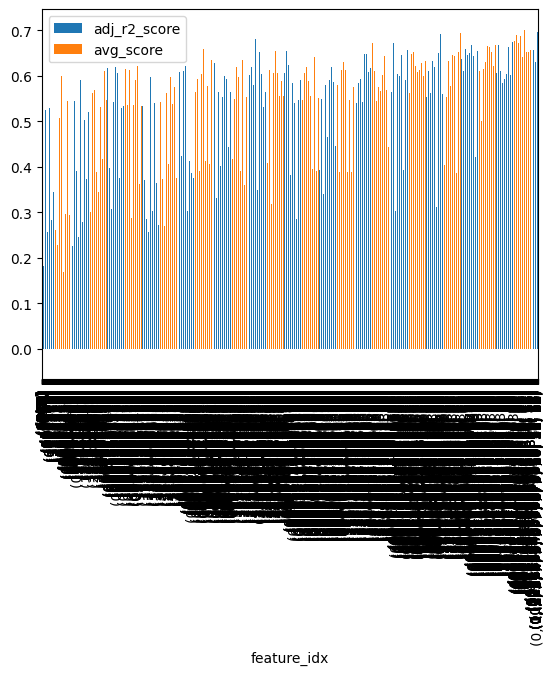

In [50]:
all_score[['adj_r2_score','avg_score']].plot(kind='bar')

In [62]:
x_train=sel.transform(x_train)
x_test=sel.transform(x_test)
print(x_train.shape)
print(x_test.shape)

model=LinearRegression()

print('Training r2_score ',np.mean(cross_val_score(model,x_train,y_train,cv=15,scoring='r2')))
print('Testing r2_score ',np.mean(cross_val_score(model,x_test,y_test,cv=15,scoring='r2')))

(404, 10)
(102, 10)
Training r2_score  0.6915910783759875
Testing r2_score  0.6267264260622526


## Sequential Backward Elimination


In [90]:
from sklearn.metrics import mean_squared_error

data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [91]:
x=data.drop('medv',axis=1)
y=data['medv']

x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['medv'], test_size=0.2, random_state=1)

stds=StandardScaler()
x_train=stds.fit_transform(x_train)
X_test=stds.transform(x_test)

print(x_train.shape)
print(x_test.shape)

model=LinearRegression()

print('Training r2_score ',np.mean(cross_val_score(model,x_train,y_train,cv=5,scoring='r2')))
print('Testing r2_score ',np.mean(cross_val_score(model,x_test,y_test,cv=5,scoring='r2')))


(404, 13)
(102, 13)
Training r2_score  0.7025123301096212
Testing r2_score  0.6514899901155401


In [93]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
lr=LinearRegression()

sfs=SFS(lr,scoring='r2',k_features='best',forward=False,floating=False,cv=5) ## backward Elimination
sfs.fit(x_train,y_train)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(1, 13), scoring='r2')

In [94]:
sfs.k_feature_idx_

(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)

In [76]:
pd.DataFrame(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7535027170817177, 0.6920238509138776, 0.682...",0.702512,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.038207,0.029727,0.014863
12,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7532855958710695, 0.6944570477695304, 0.693...",0.70581,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.035641,0.02773,0.013865
11,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7547108925568492, 0.6959627893665097, 0.701...",0.708109,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.035367,0.027516,0.013758
10,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7769593921905562, 0.6884741223718953, 0.702...",0.710033,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.046075,0.035848,0.017924
9,"(0, 1, 4, 5, 7, 8, 9, 10, 12)","[0.7706104220711025, 0.6854023389684323, 0.690...",0.704324,"(0, 1, 4, 5, 7, 8, 9, 10, 12)",0.046449,0.036139,0.018069
8,"(0, 1, 4, 5, 7, 8, 10, 12)","[0.7681719744800458, 0.6822126526818693, 0.670...",0.697727,"(0, 1, 4, 5, 7, 8, 10, 12)",0.04882,0.037984,0.018992
7,"(0, 1, 4, 5, 7, 10, 12)","[0.7671638009750724, 0.6812300799626649, 0.661...",0.692234,"(0, 1, 4, 5, 7, 10, 12)",0.051644,0.040181,0.02009
6,"(1, 4, 5, 7, 10, 12)","[0.7519120213497091, 0.6756087674652564, 0.646...",0.686004,"(1, 4, 5, 7, 10, 12)",0.046845,0.036447,0.018224
5,"(4, 5, 7, 10, 12)","[0.7525552802357769, 0.6665033988504306, 0.639...",0.681065,"(4, 5, 7, 10, 12)",0.051233,0.039861,0.019931
4,"(5, 7, 10, 12)","[0.7384743962575442, 0.6401188507668829, 0.587...",0.662544,"(5, 7, 10, 12)",0.063384,0.049315,0.024658


In [95]:
all_score=pd.DataFrame(sfs.get_metric_dict()).T
all_score['number_of_features']=all_score['feature_idx'].apply(lambda x:len(x))
all_score['observations']=x_train.shape[0]
all_score.set_index('feature_idx',inplace=True)
all_score['adj_r2_score']=adjust_r2(all_score['avg_score'],all_score['observations'],all_score['number_of_features'])
all_score

,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err,number_of_features,observations,adj_r2_score
feature_idx,,,,,,,,,
"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.7535027170817177, 0.6920238509138776, 0.682...",0.702512,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)",0.038207,0.029727,0.014863,13,404,0.692596
"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7532855958710695, 0.6944570477695304, 0.693...",0.70581,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.035641,0.02773,0.013865,12,404,0.696781
"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7547108925568492, 0.6959627893665097, 0.701...",0.708109,"(0, 1, 3, 4, 5, 7, 8, 9, 10, 11, 12)",0.035367,0.027516,0.013758,11,404,0.699918
"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)","[0.7769593921905562, 0.6884741223718953, 0.702...",0.710033,"(0, 1, 4, 5, 7, 8, 9, 10, 11, 12)",0.046075,0.035848,0.017924,10,404,0.702654
"(0, 1, 4, 5, 7, 8, 9, 10, 12)","[0.7706104220711025, 0.6854023389684323, 0.690...",0.704324,"(0, 1, 4, 5, 7, 8, 9, 10, 12)",0.046449,0.036139,0.018069,9,404,0.69757
"(0, 1, 4, 5, 7, 8, 10, 12)","[0.7681719744800458, 0.6822126526818693, 0.670...",0.697727,"(0, 1, 4, 5, 7, 8, 10, 12)",0.04882,0.037984,0.018992,8,404,0.691605
"(0, 1, 4, 5, 7, 10, 12)","[0.7671638009750724, 0.6812300799626649, 0.661...",0.692234,"(0, 1, 4, 5, 7, 10, 12)",0.051644,0.040181,0.02009,7,404,0.686794
"(1, 4, 5, 7, 10, 12)","[0.7519120213497091, 0.6756087674652564, 0.646...",0.686004,"(1, 4, 5, 7, 10, 12)",0.046845,0.036447,0.018224,6,404,0.681258
"(4, 5, 7, 10, 12)","[0.7525552802357769, 0.6665033988504306, 0.639...",0.681065,"(4, 5, 7, 10, 12)",0.051233,0.039861,0.019931,5,404,0.677058


<Axes: xlabel='feature_idx'>

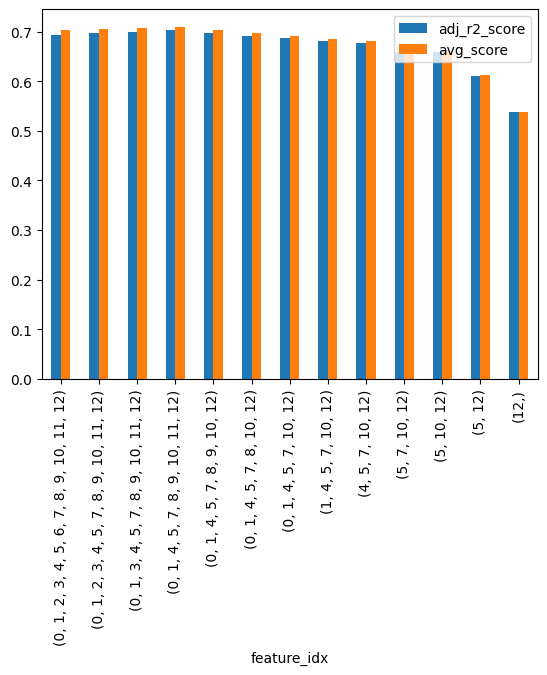

In [96]:
all_score[['adj_r2_score','avg_score']].plot(kind='bar')

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Number of Features', ylabel='Performance'>)

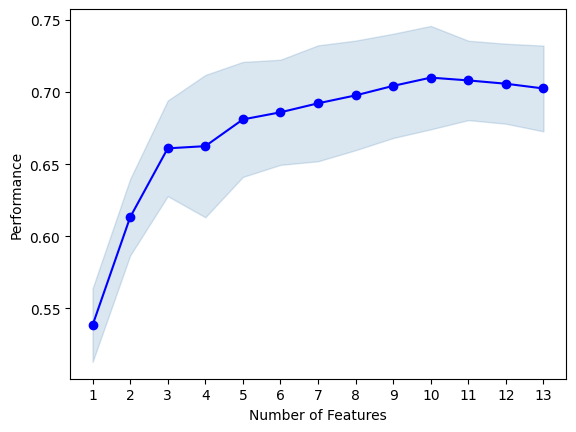

In [97]:
from mlxtend.plotting import plot_sequential_feature_selection as plt_sfs

plt_sfs(sfs.get_metric_dict())

In [98]:
x_train=sfs.transform(x_train)
x_test=sfs.transform(x_test)
print(x_train.shape)
print(x_test.shape)

model=LinearRegression()

print('Training r2_score ',np.mean(cross_val_score(model,x_train,y_train,cv=5,scoring='r2')))
print('Testing r2_score ',np.mean(cross_val_score(model,x_test,y_test,cv=5,scoring='r2')))

(404, 10)
(102, 10)
Training r2_score  0.7100327839218561
Testing r2_score  0.7205819296124464


# Forward Selection

In [119]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS

x=data.drop('medv',axis=1)
y=data['medv']

x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df['medv'], test_size=0.2, random_state=1)

stds=StandardScaler()
x_train=stds.fit_transform(x_train)
X_test=stds.transform(x_test)

print(x_train.shape)
print(x_test.shape)

x_train=pd.DataFrame(x_train,columns=data.columns[:-1])
x_test=pd.DataFrame(x_test,columns=data.columns[:-1])

model=LinearRegression()

sfs2 = SFS(model,
           n_features_to_select=5,
           direction='forward',
           scoring='r2',
           n_jobs=-1,
           cv=5)

sfs2 = sfs2.fit(x_train, y_train)

(404, 13)
(102, 13)


In [120]:
sfs2.support_

array([False, False, False, False, False,  True, False,  True, False,
       False,  True,  True,  True])

In [121]:
x_train.columns[sfs2.support_].values

array(['rm', 'dis', 'ptratio', 'b', 'lstat'], dtype=object)

In [122]:
x_train=sfs2.transform(x_train)
x_test=sfs2.transform(x_test)
print(x_train.shape)
print(x_test.shape)

model=LinearRegression()

print('Training r2_score ',np.mean(cross_val_score(model,x_train,y_train,cv=5,scoring='r2')))
print('Testing r2_score ',np.mean(cross_val_score(model,x_test,y_test,cv=5,scoring='r2')))

(404, 5)
(102, 5)
Training r2_score  0.6714957524062923
Testing r2_score  0.7505189069289495
